# Scenarion description - Teste to see if I can modify


* Finding the maximum number of retransmissions in a spectrum sharing scenario

The throughput is calculated using

$T=log(1+\beta)\times P_{SUC}$

$P_{SUC}=(1-P_{e}^{1+m})$ 

where $m$ denotes the maximum number of retransmissions, $P_{SUC}$ is the probability that the packet is successfully decoded by the aggregator and $P_{e}$ is the  probability that the packet is not successfully decoded by the aggregator.

$T=\frac{log(1+\beta)}{1+\bar{m}}\times(1-P_e^{1+m})$

$1+\bar{m}$:Average number of successful transmission attempts.

$1+\bar{m}=\sum_{n=0}^{m} \frac{1-\epsilon}{1-\epsilon^{\frac{1}{1+m}}}$

The optimization problem can be formulated as

Max $T(\beta,m)=\frac{log(1+\beta)}{1+\bar{m}}\times (1-(1-e^{-\lambda*k*\pi*d^2*\beta^{2/\alpha}})^{\frac{1}{1+m}})$

subject to

$1-P_{SUC}\leq \epsilon$ (for robust communication)

Considering the constraint, T will be simplifeid into

$T=log(1+\beta)\times (1 - \epsilon^{\frac{1}{m + 1}})$

 Considering that 
 
 * $P_{SUC}=1-P_e$
 * $P_e=P_o^{1+m}$
 * $P_o=1-e^{-k*\beta^{2/\alpha}}$
 
 
 After some mathematical manipulations
 
 $\beta^\ast=\left(- \frac{1}{k} \log{\left (1 - \epsilon^{\frac{1}{m + 1}} \right )}\right)^{\frac{\alpha}{2}}$
 
 The throughput can then be calculated using the below equation


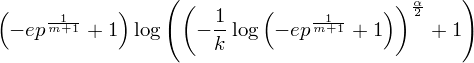

In [2]:
# Scipy stuff
from sympy import Symbol, symbols, init_printing, oo
from sympy import simplify
from sympy import exp, gamma, log, LambertW
from sympy.integrals import integrate
from sympy import *
from scipy.optimize import fsolve

# From future
from __future__ import division

# Setting things up
init_printing(use_unicode = False, wrap_line = False, no_global = True)
#variables
k, wp, ws, lambda_int, beta, alpha, m, kappa,ep = symbols('k wp m lambda_\mathrm{int} beta alpha m kappa ep', real = True, positive = True)





#since 1-ps=ep

#T = (log(1+ beta,2)/mbar)*(ep**(1+m))
#T = (log(1+ beta,2))*(1-(ep**(1+m)))
#T=(1-(ep**(1+m)))*log(1+beta)
#be=((1-exp(-k*beta**(2/alpha)))**(1+m))


   
beta=((-ln(1-ep**(1/(1+m))))/k)**(alpha/2)
T=(1-ep**(1/(1+m)))*log(1+beta)
T


In the above equation, $k=\kappa\times\lambda\times\pi\times d^2$

* $\kappa=\Gamma{\left(1 - \frac{2}{\alpha} \right)} \Gamma{\left(1 + \frac{2}{\alpha} \right)}$

To find the maximum number of retransmissions, we need to find the value that maximizes the troughput equation which was earlier derived as a function of m.

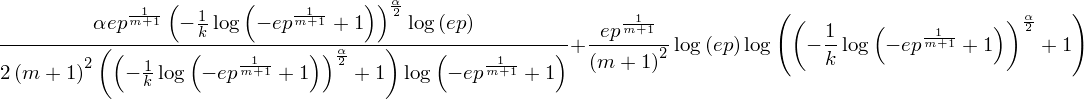

In [3]:
h=diff(T,m)
h

After some manipulations, the simplified version of the obove derivative would be

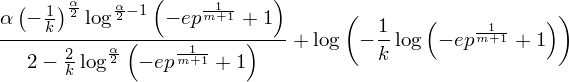

In [4]:
#simplifying the derivative 

z1=alpha*((-1/k)**(alpha/2))*(((log(1-ep**(1/(1+m)))))**((alpha/2)-1))
z2=2*((-1/k)*log(1-ep**(1/(1+m)))**(alpha/2)+1)
z3=log((-1/k)*((log(1-ep**(1/(1+m))))))
sim=(z1/z2)+z3
sim

Inserting the numerical values of the equation constants, we would have the following equation.

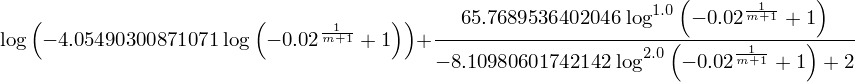

In [5]:
alpha=4
d=1
lambda_int=0.05
kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
k=kappa*lambda_int*3.14*d**2
ep=0.02
#m=5

z1=alpha*((-1/k)**(alpha/2))*(((log(1-ep**(1/(1+m)))))**((alpha/2)-1))
z2=2*((-1/k)*log(1-ep**(1/(1+m)))**(alpha/2)+1)
z3=log((-1/k)*((log(1-ep**(1/(1+m))))))
sim=(z1/z2)+z3
sim

 The maximum number of retransmissions ($m^\ast$) that maximizes that throughput in this spectrum sharing scenario is given by
 
$m^\ast= \max\limits_{m \in \mathcal{N}} \frac{\alpha \left(- \frac{1}{k}\right)^{\frac{\alpha}{2}} \log^{\frac{\alpha}{2} - 1}{\left (1 - \epsilon^{\frac{1}{m + 1}}  \right )}}{2 - \frac{2}{k} \log^{\frac{\alpha}{2}}{\left (1 - \epsilon^{\frac{1}{m + 1}}  \right )}} + \log{\left (- \frac{1}{k} \log{\left (1 -\epsilon^{\frac{1}{m + 1}}  \right )} \right )}$

<IPython.core.display.Javascript object>


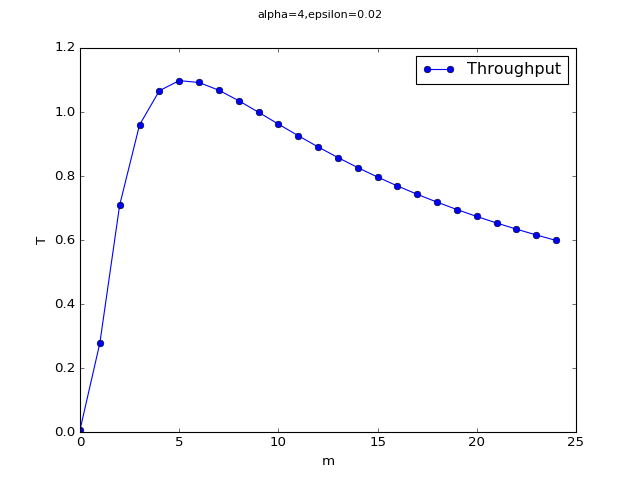

In [6]:
#plotting
%matplotlib notebook
from sympy import Symbol, symbols, init_printing, oo
from sympy import simplify
from sympy import exp, gamma, log, LambertW
from sympy.integrals import integrate
from sympy import *
from scipy.optimize import fsolve

# From future

from matplotlib import rc, rcParams
from scipy.optimize import fsolve
from __future__ import division
import numpy as np
import math

import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

# Setting things up
init_printing(use_unicode = False, wrap_line = False, no_global = True)
#variables
k, wp, ws, lambda_int, beta, alpha, m, kappa,ep = symbols('k wp m lambda_\mathrm{int} beta alpha m kappa ep', real = True, positive = True)

T=[]


for m in range(0,25):
    alpha=4
    d=1
    lambda_int=0.05
    kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
    k=kappa*lambda_int*np.pi*d**2
    ep=0.02
    #alpha=3
    #kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
  

    beta=((-ln(1-ep**(1/(1+m))))/k)**(alpha/2)
   

     
    T.append((1-ep**(1/(1+m)))*log(1+beta))
    #T.append((((1-ep**(1/(1+m)))*log(1+beta))*ep)/(1-ep))
    #print(T)
   
fig = plt.figure()
fig.suptitle('alpha=4,epsilon=0.02', fontsize=10)    
plt.xlabel('m')
plt.ylabel('T')
plt.plot(range(0,25),T, marker = 'o', linestyle = 'solid', label='Throughput')

plt.legend(loc = 'best')
plt.show()

In [10]:
T

<img src="desktop/optimizationproblem/resultt.png" width="800">

We can see from this graph that the maximum number of retransmissions for this scenarion is $m^\ast=5$.

For experimenting the effect of increasing the packet density ($\lambda$) on the throughput and the number of maximum retransmissions:

<IPython.core.display.Javascript object>


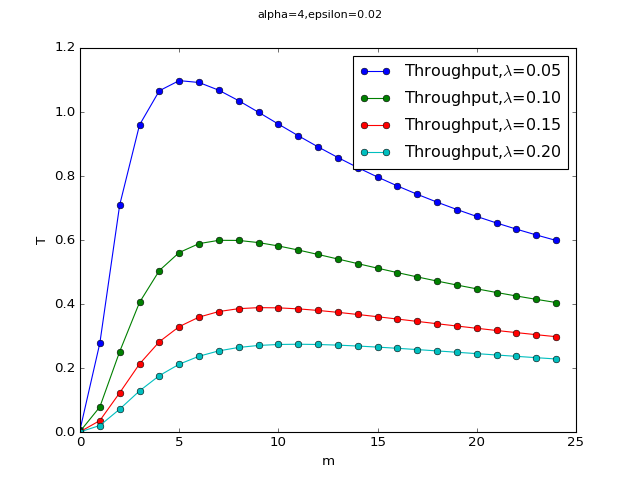

In [7]:
#plotting for different lamdas
from IPython.display import Latex
from sympy import Symbol, symbols, init_printing, oo
from sympy import simplify
from sympy import exp, gamma, log, LambertW
from sympy.integrals import integrate
from sympy import *
from scipy.optimize import fsolve

# From future

from matplotlib import rc, rcParams
from scipy.optimize import fsolve
from __future__ import division
import numpy as np
import math

import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

# Setting things up
init_printing(use_unicode = False, wrap_line = False, no_global = True)
#variables
k, wp, ws, lambda_int, beta, alpha, m, kappa,ep = symbols('k wp m lambda_\mathrm{int} beta alpha m kappa ep', real = True, positive = True)

T=[]


for m in range(0,25):
    alpha=4
    d=1
    lambda_int=0.05
    kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
    k=kappa*lambda_int*np.pi*d**2
    ep=0.02
    #alpha=3
    #kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
  

    beta=((-ln(1-ep**(1/(1+m))))/k)**(alpha/2)
   

     
    T.append((1-ep**(1/(1+m)))*log(1+beta))
#############################################################
    
T1=[]
for m in range(0,25):
    alpha=4
    d=1
    lambda_int=0.10
    kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
    k=kappa*lambda_int*pi*d**2
    ep=0.02
    #alpha=3
    #kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
  

    beta=((-ln(1-ep**(1/(1+m))))/k)**(alpha/2)
   

     
    T1.append((1-ep**(1/(1+m)))*log(1+beta))
###################################################################

T2=[]
for m in range(0,25):
    alpha=4
    d=1
    lambda_int=0.15
    kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
    k=kappa*lambda_int*pi*d**2
    ep=0.02
    #alpha=3
    #kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
  

    beta=((-ln(1-ep**(1/(1+m))))/k)**(alpha/2)
   

     
    T2.append((1-ep**(1/(1+m)))*log(1+beta))
##################################################################
T3=[]
for m in range(0,25):
    alpha=4
    d=1
    lambda_int=0.20
    kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
    k=kappa*lambda_int*pi*d**2
    ep=0.02
    #alpha=3
    #kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
  

    beta=((-ln(1-ep**(1/(1+m))))/k)**(alpha/2)
   

     
    T3.append((1-ep**(1/(1+m)))*log(1+beta))
##################################################################
%matplotlib notebook
fig = plt.figure()
fig.suptitle('alpha=4,epsilon=0.02', fontsize=10)    
plt.xlabel('m')
plt.ylabel('T')
plt.plot(range(0,25),T, marker = 'o', linestyle = 'solid', label='Throughput,$\lambda$=0.05')
plt.plot(range(0,25),T1, marker = 'o', linestyle = 'solid', label='Throughput,$\lambda$=0.10')
plt.plot(range(0,25),T2, marker = 'o', linestyle = 'solid', label='Throughput,$\lambda$=0.15')
plt.plot(range(0,25),T3, marker = 'o', linestyle = 'solid', label='Throughput,$\lambda$=0.20')

plt.legend(loc = 'best')
plt.show()

<img src="desktop/optimizationproblem/lamdachanging.png" width="800">

We can see that increasing the packet density pushes the maximum number of retransmissions to higher values.

<IPython.core.display.Javascript object>


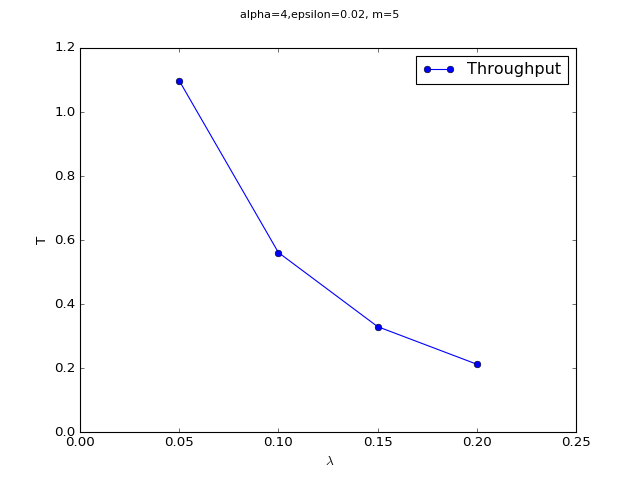

In [13]:
#plotting
from sympy import Symbol, symbols, init_printing, oo
from sympy import simplify
from sympy import exp, gamma, log, LambertW
from sympy.integrals import integrate
from sympy import *
from scipy.optimize import fsolve


# From future

from matplotlib import rc, rcParams
from scipy.optimize import fsolve
from __future__ import division
import numpy as np
import math

import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

# Setting things up
init_printing(use_unicode = False, wrap_line = False, no_global = True)
#variables
k, wp, ws, lambda_int, beta, alpha, m, kappa,ep = symbols('k wp m lambda_\mathrm{int} beta alpha m kappa ep', real = True, positive = True)

T=[]


#lambda_int = 0.0
lambda_int_list=[0.05, 0.1, 0.15, 0.20]
for lambda_int in lambda_int_list:
   
    
    alpha=4
    d=1
    m=5
    kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
    k=kappa*lambda_int*np.pi*d**2
    ep=0.02
    #alpha=3
    #kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
  

    beta=((-ln(1-ep**(1/(1+m))))/k)**(alpha/2)
   

     
    T.append((1-ep**(1/(1+m)))*log(1+beta))
    #T.append((((1-ep**(1/(1+m)))*log(1+beta))*ep)/(1-ep))
    #print(T)
    #lambda_int += 0.05
    
    
%matplotlib notebook
fig = plt.figure()
fig.suptitle('alpha=4,epsilon=0.02, m=5', fontsize=10)    
plt.xlabel(' $\lambda$')
plt.ylabel('T')
plt.xlim( 0, 0.25)
plt.ylim( 0, 1.2)
plt.plot(lambda_int_list,T, marker = 'o', linestyle = 'solid', label='Throughput')
#plt.plot(T, marker = 'o', linestyle = 'solid', label='Throughput')

plt.legend(loc = 'best')
plt.show()
T

<img src="desktop/optimizationproblem/result4.png" width="700">

It is clear that increasing the packet density highly reduces the throughput .



<IPython.core.display.Javascript object>


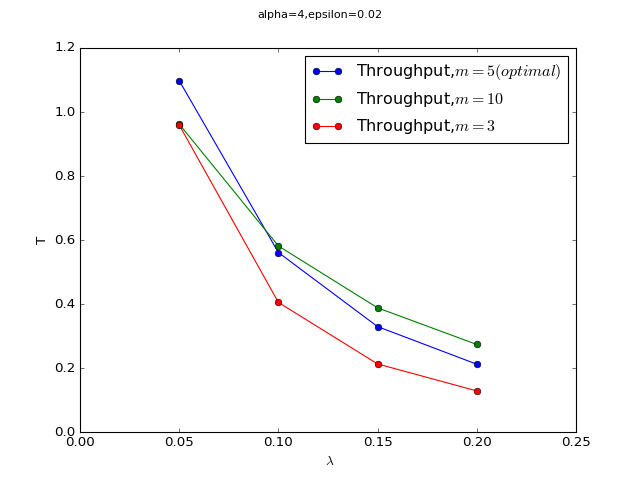

In [19]:
#plotting
from sympy import Symbol, symbols, init_printing, oo
from sympy import simplify
from sympy import exp, gamma, log, LambertW
from sympy.integrals import integrate
from sympy import *
from scipy.optimize import fsolve


# From future

from matplotlib import rc, rcParams
from scipy.optimize import fsolve
from __future__ import division
import numpy as np
import math

import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

# Setting things up
init_printing(use_unicode = False, wrap_line = False, no_global = True)
#variables
k, wp, ws, lambda_int, beta, alpha, m, kappa,ep = symbols('k wp m lambda_\mathrm{int} beta alpha m kappa ep', real = True, positive = True)

T=[]


#lambda_int = 0.0
lambda_int_list=[0.05, 0.1, 0.15, 0.20]
for lambda_int in lambda_int_list:
   
    
    alpha=4
    d=1
    m=5
    kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
    k=kappa*lambda_int*np.pi*d**2
    ep=0.02
    #alpha=3
    #kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
  

    beta=((-ln(1-ep**(1/(1+m))))/k)**(alpha/2)
   

     
    T.append((1-ep**(1/(1+m)))*log(1+beta))
    #T.append((((1-ep**(1/(1+m)))*log(1+beta))*ep)/(1-ep))
    #print(T)
    #lambda_int += 0.05
##########################################################################    
T1=[]


#lambda_int = 0.0
lambda_int_list=[0.05, 0.1, 0.15, 0.20]
for lambda_int in lambda_int_list:
   
    
    alpha=4
    d=1
    m=10
    kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
    k=kappa*lambda_int*np.pi*d**2
    ep=0.02
    #alpha=3
    #kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
  

    beta=((-ln(1-ep**(1/(1+m))))/k)**(alpha/2)
   

     
    T1.append((1-ep**(1/(1+m)))*log(1+beta))   
##################################################################################    
T2=[]


#lambda_int = 0.0
lambda_int_list=[0.05, 0.1, 0.15, 0.20]
for lambda_int in lambda_int_list:
   
    
    alpha=4
    d=1
    m=3
    kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
    k=kappa*lambda_int*np.pi*d**2
    ep=0.02
    #alpha=3
    #kappa = gamma(1 + 2/alpha)* gamma(1- 2/alpha)
  

    beta=((-ln(1-ep**(1/(1+m))))/k)**(alpha/2)
   

     
    T2.append((1-ep**(1/(1+m)))*log(1+beta))
#####################################################   

#%matplotlib notebook

fig = plt.figure()
fig.suptitle('alpha=4,epsilon=0.02', fontsize=10)    
plt.xlabel(' $\lambda$')
plt.ylabel('T')
plt.xlim( 0, 0.25)
plt.ylim( 0, 1.2)
plt.plot(lambda_int_list,T, marker = 'o', linestyle = 'solid', label='Throughput,$m=5(optimal)$')
plt.plot(lambda_int_list,T1, marker = 'o', linestyle = 'solid', label='Throughput,$m=10$')
plt.plot(lambda_int_list,T2, marker = 'o', linestyle = 'solid', label='Throughput,$m=3$')
#plt.plot(T, marker = 'o', linestyle = 'solid', label='Throughput')

plt.legend(loc = 'best')
plt.show()
T
T1
T2

<img src="desktop/optimizationproblem/result7.png" width="700">